In [1]:
# vLLMのインストール
!pip install vllm

# 動作確認用のライブラリ
!pip install requests

以下のように、「セッションを再起動する」という警告が出たら、セッションを再起動してもう一度実行してください。

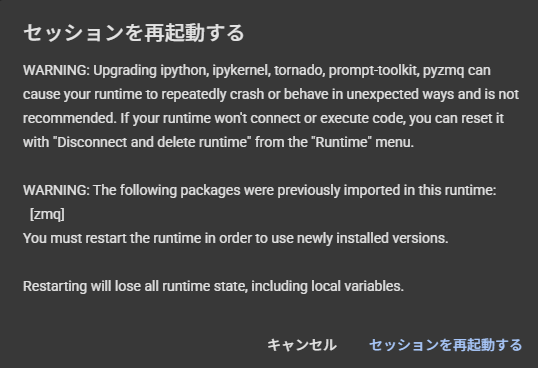

In [2]:
#実行確認（セルの実行が止まらないので、実際には次の「バックグラウンド実行」を利用します）
!vllm serve Qwen/Qwen2.5-VL-3B-Instruct --port 8000 --host 0.0.0.0 --gpu-memory-utilization 0.8 --max-model-len 512 --max-num-seqs 1

2025-06-22 22:56:23.134672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750632983.411597    2274 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750632983.488630    2274 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-22 22:56:24.149197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO 06-22 22:56:33 [__init__.py:244] Automatically detected platform cuda.
INFO 06-22 22:56:44 [api_server.py:1287] vLLM API

In [3]:
#バックグラウンド実行
!DATE=$(date +%Y%m%d_%H%M%S); nohup vllm serve Qwen/Qwen2.5-VL-3B-Instruct --port 8000 --host 0.0.0.0 --gpu-memory-utilization 0.8 --max-model-len 2048 --max-num-seqs 1 > vllm_server_${DATE}_log 2>&1 &

#バックグラウンド実行しているサーバを停止する場合は以下を実行
# !pkill -f "vllm serve"

In [6]:
# 利用可能なエンドポイントを確認
import requests
response = requests.get("http://localhost:8000/v1/models")
print(response.json())

{'object': 'list', 'data': [{'id': 'Qwen/Qwen2.5-VL-3B-Instruct', 'object': 'model', 'created': 1750633778, 'owned_by': 'vllm', 'root': 'Qwen/Qwen2.5-VL-3B-Instruct', 'parent': None, 'max_model_len': 2048, 'permission': [{'id': 'modelperm-41c639c47fe04470ada715a674498f55', 'object': 'model_permission', 'created': 1750633778, 'allow_create_engine': False, 'allow_sampling': True, 'allow_logprobs': True, 'allow_search_indices': False, 'allow_view': True, 'allow_fine_tuning': False, 'organization': '*', 'group': None, 'is_blocking': False}]}]}


注意：vllmが起動するまで数分程度の時間がかかります。
左のフォルダアイコンでvllm_server_*.logというファイルで進行状況を確認するか、右上のRAMディスクのアイコンをクリックして、GPU RAMが13GB程度になったら試してみてください。


Visual PromptとしてSet-of-Mark promptを施す前の画像と施した後の画像で出力を比べてみましょう！

In [7]:
import base64
from PIL import Image
import io
import json


# サンプル画像のアップロード（Colabのファイルアップロード機能を使用）
from google.colab import files
uploaded = files.upload()

# アップロードした画像をbase64エンコード
image_path = list(uploaded.keys())[0]
with open(image_path, "rb") as image_file:
    image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

Saving a3c3w3_with_segment_number.png to a3c3w3_with_segment_number.png


In [14]:
prompt = "画像について詳細に説明して下さい"

url = "http://localhost:8000/v1/chat/completions"
headers = {
    "Content-Type": "application/json"
}

# プロンプトと画像をサーバに送信して回答を受信
payload_with_image = {
    "model": "Qwen/Qwen2.5-VL-3B-Instruct",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_base64}"
                    }
                }
            ]
        }
    ],
    "max_tokens": 512,
    "temperature": 0,
}

response = requests.post(url, json=payload_with_image, headers=headers)
print(json.dumps(response.json(), indent=2))

{
  "id": "chatcmpl-81a82896c7c44a8a811ed492e87c353c",
  "object": "chat.completion",
  "created": 1750633960,
  "model": "Qwen/Qwen2.5-VL-3B-Instruct",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "reasoning_content": null,
        "content": "\u753b\u50cf\u306b\u306f\u3001\u69d8\u3005\u306a\u7a2e\u985e\u306e\u30ca\u30c3\u30c4\u304c\u4e26\u3093\u3067\u3044\u307e\u3059\u3002\u4ee5\u4e0b\u306b\u305d\u308c\u305e\u308c\u306e\u30ca\u30c3\u30c4\u3092\u8a73\u7d30\u306b\u8aac\u660e\u3057\u307e\u3059\uff1a\n\n1. **\u30d4\u30fc\u30ca\u30c3\u30c4\uff08No. 13\uff09**\uff1a\n   - \u5916\u89b3\uff1a\u5c0f\u3055\u306a\u3001\u4e38\u3044\u5f62\u3092\u3057\u3066\u304a\u308a\u3001\u8868\u9762\u306f\u6ed1\u3089\u304b\u3067\u3059\u3002\n   - \u8272\uff1a\u8336\u8272\u304c\u304b\u3063\u305f\u9ec4\u8272\u3067\u3059\u3002\n\n2. **\u30a2\u30fc\u30e2\u30f3\u30c9\uff08No. 11\uff09**\uff1a\n   - \u5916\u89b3\uff1a\u5c0f\u3055\u306a\u3001\u9577\u65b9\u5f62\u306e\u

In [15]:
# 出力
print(response.json()["choices"][0]["message"]["content"])

画像には、様々な種類のナッツが並んでいます。以下にそれぞれのナッツを詳細に説明します：

1. **ピーナッツ（No. 13）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：茶色がかった黄色です。

2. **アーモンド（No. 11）**：
   - 外観：小さな、長方形の形をしており、表面は滑らかです。
   - 色：茶色がかった黄色です。

3. **カシスナッツ（No. 9）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：白と茶色がかった黄色です。

4. **ナッツ（No. 18）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：白と茶色がかった黄色です。

5. **ナッツ（No. 17）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：白と茶色がかった黄色です。

6. **ナッツ（No. 10）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：白と茶色がかった黄色です。

7. **ナッツ（No. 15）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：白と茶色がかった黄色です。

8. **ナッツ（No. 19）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：白と茶色がかった黄色です。

9. **ナッツ（No. 12）**：
   - 外観：小さな、丸い形をしており、表面は滑らかです。
   - 色：白と茶色がかった黄色です。

10. **ナッツ（No. 14）**：
    - 外観：
